### Import Libraries

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the dataset and display the first 5 rows

df = pd.read_csv('movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Descriptive Analysis

In [36]:
# Check for types of data

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
# Check for missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [39]:
# Replace missing values in 'rating' with most frequent value

df['rating'].replace(np.nan, df['rating'].mode()[0], inplace=True)

# Replace othe missing values with 0

df.fillna(0, inplace=True)

C:\Users\nadir\AppData\Local\Temp\ipykernel_2964\917313551.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(np.nan, df['rating'].mode()[0], inplace=True)


In [40]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

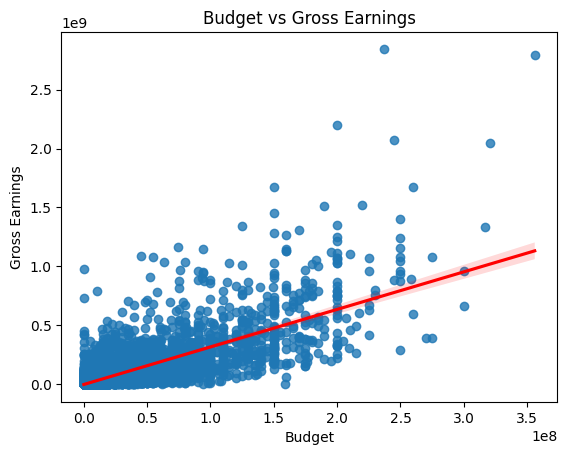

In [41]:
# Regression plot 'budget' vs 'gross'  

sns.regplot(data=df, x='budget', y='gross', line_kws={"color": "red"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [42]:
# Correlation 

df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


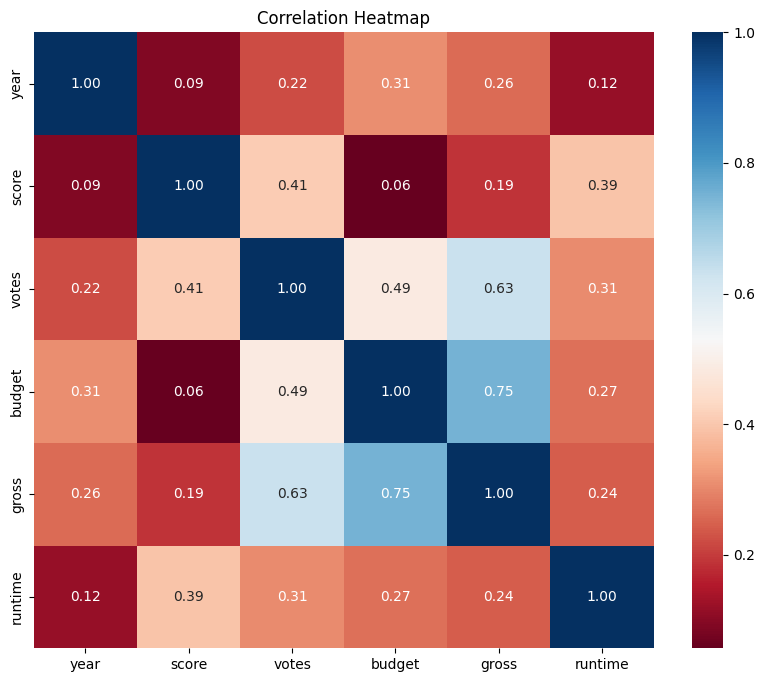

In [43]:
# Heatmap of correlations   

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Number of movies per year

df.groupby('year')['name'].count().to_frame().reset_index().rename(columns={'name': 'number_of_movies'}).sort_values(by='year')



,year,number_of_movies
0,1980,92
1,1981,113
2,1982,126
3,1983,144
4,1984,168
5,1985,200
6,1986,200
7,1987,200
8,1988,200
9,1989,200


In [45]:
# Top 5 countries with the most movies

df['country'].value_counts().head(5).to_frame().reset_index().rename(columns={'index': 'country'})

,country,count
0,United States,5475
1,United Kingdom,816
2,France,279
3,Canada,190
4,Germany,117


<Axes: xlabel='genre'>

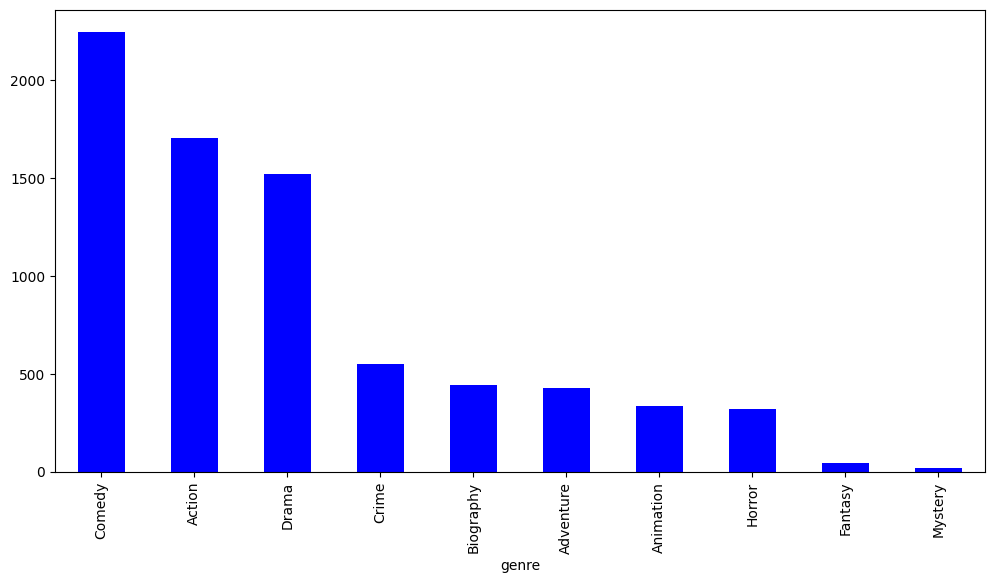

In [46]:
# Number of movies per genre 

df['genre'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), color='blue')

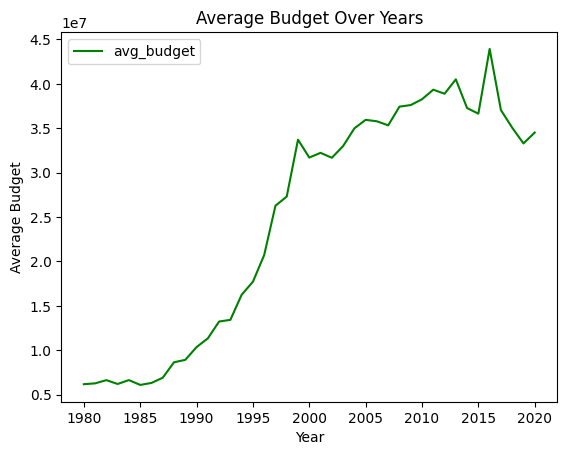

In [47]:
# Average budget over years

new_df = df.groupby('year')['budget'].mean().to_frame().reset_index().rename(columns={'budget': 'avg_budget'}).sort_values(by='year')
new_df.plot(x='year', y='avg_budget', kind='line', color='green')

plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Budget Over Years')
plt.show()

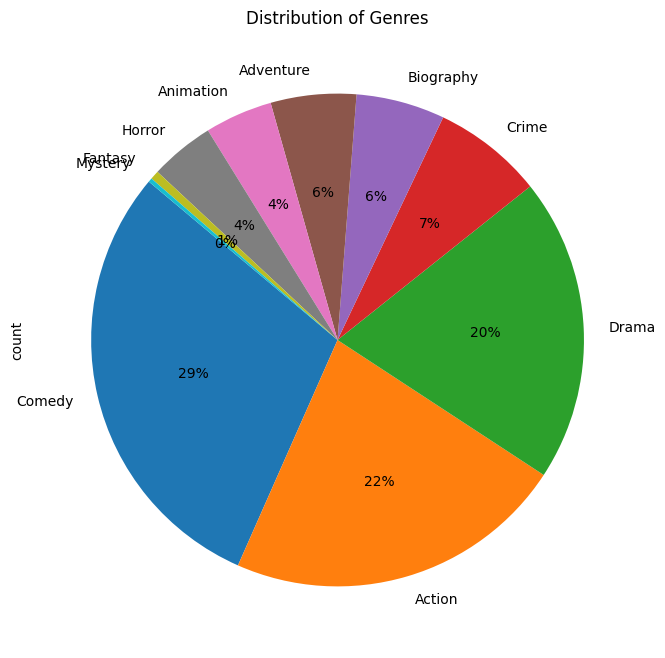

In [48]:
# Distribution of Genres

df['genre'].value_counts().head(10).plot(kind='pie', autopct='%1.f%%', figsize=(8, 8), startangle=140)
plt.title('Distribution of Genres')
plt.show()

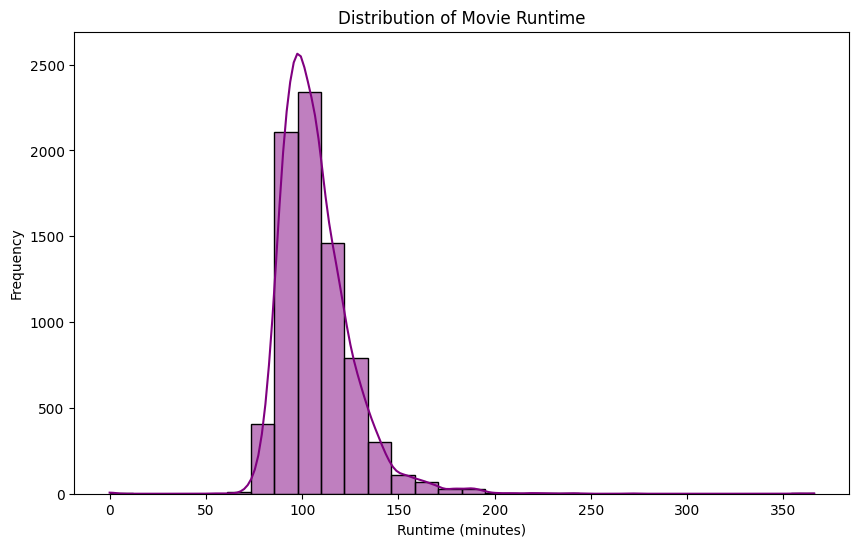

In [49]:
# Histohram movies runtime distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

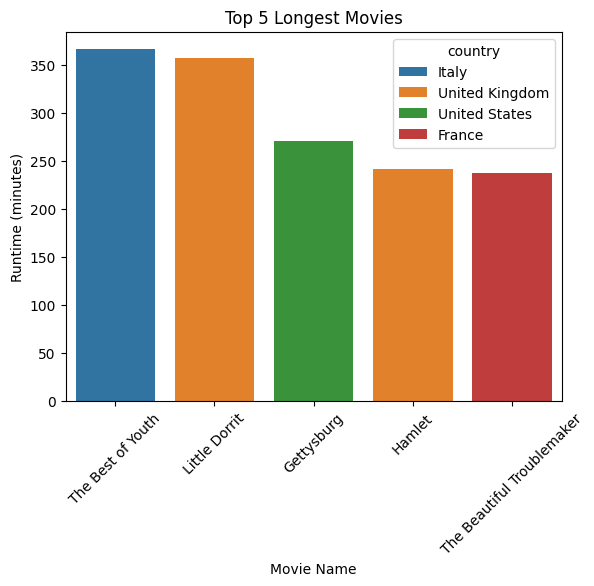

In [50]:
# Top 5 longest movies

longest_movies = df.sort_values(by='runtime', ascending=False).head(5)
sns.barplot(data=longest_movies, x='name', y='runtime', hue='country')
plt.title('Top 5 Longest Movies')
plt.xlabel('Movie Name')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)
plt.show()
